## Introduction to Background Removal

Background Removal - Isolates objects from their original backgrounds.

### Use Case

OctankFashion want to reuse some of the marketing images of their shirts on their retail website product pages. Their website design standards dictate that all product images must have a transparent background so as not to distract from the shirt's design. Nova Canvas's background removal features is perfect for this task.

To use this feature, you just need to provide the image to the model. The model will automatically determine which parts of the image should be considered foreground and background, no prompting required!


<div class="alert alert-block alert-warning">
<b>Prerequisites:</b> Please run the prerequiresites <b>00-prerequisites.ipynb</b> first before proceeding.
</div>


In [1]:
import io
import json
import base64
import boto3
from botocore.config import Config
from PIL import Image
from utils import save_image, plot_images

bedrock_runtime_client = boto3.client(
    "bedrock-runtime",
    region_name="us-east-1",
    config=Config(
        read_timeout=5 * 60
    ),  # IMPORTANT: Increase the read timeout to 5 minutes to support longer operations.
)
image_generation_model_id = "amazon.nova-canvas-v1:0"
output_dir = "output"

The following parameters are specific to the "BACKGROUND_REMOVAL" task type and are encapsulated in the `backgroundRemovalParams` field of the request body.

- `image` (Required) – The JPEG or PNG image to modify, encoded as a Base64 string. (See code below for how to encode an image as Base64.)

To demonstrate, we'll use the image below. Run the cells below to remove the background. The generated image will be saved to the "output" folder.

<img src="images/tshirt_palm_tree_wood_bkg.png" height="400">


In [2]:
# Specify the image from which to remove the background.
reference_image_path = "images/tshirt_palm_tree_wood_bkg.png"

Generating image...
Image saved to output/04-background-removal.png


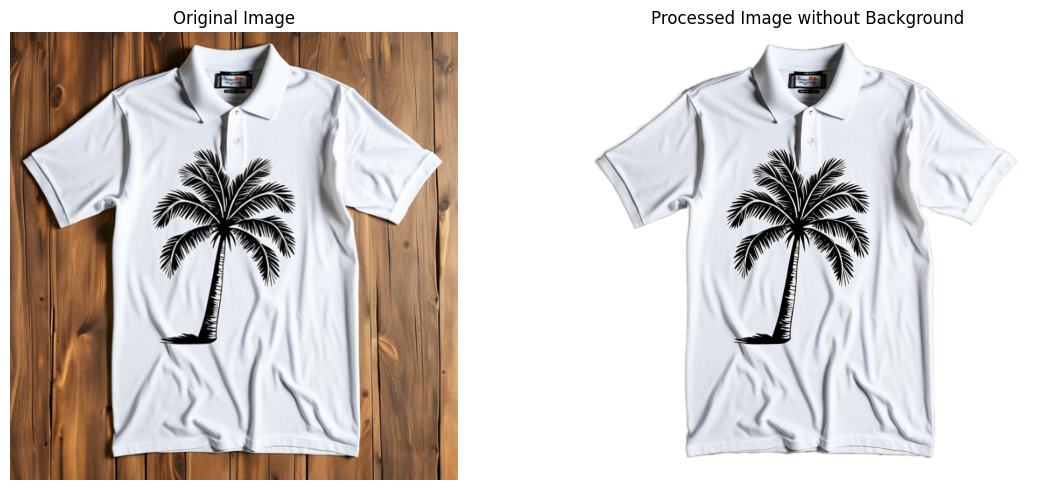

In [3]:
with open(reference_image_path, "rb") as image_file:
    input_image = base64.b64encode(image_file.read()).decode("utf8")

body = json.dumps(
    {
        "taskType": "BACKGROUND_REMOVAL",
        "backgroundRemovalParams": {"image": input_image},
    }
)

print("Generating image...")

response = bedrock_runtime_client.invoke_model(
    body=body,
    modelId=image_generation_model_id,
    accept="application/json",
    contentType="application/json",
)

response_body = json.loads(response.get("body").read())

base64_images = response_body.get("images")
image_path = f"{output_dir}/04-background-removal.png"
save_image(base64_images[0], image_path)

print(f"Image saved to {image_path}")

response_images = [
    Image.open(io.BytesIO(base64.b64decode(base64_image)))
    for base64_image in base64_images
]

plot_images(
    response_images,
    ref_image_path=reference_image_path,
    original_title="Original Image",
    processed_title="Processed Image without Background",
)

## Take Away


Background removal is a powerful feature that automatically detects and isolates objects in images. This tool creates a transparent background, preserving only the main subject. By eliminating the original background, users can easily manipulate the isolated object, placing it into new contexts or compositions.
